### Target:
    
    - Add LR Scheduler ReduceLROnPlateau.

### Results:

    - Model has 7979 parameters.

    - Train Accuracy = 98.85

    - Test Accuracy = 99.44

### Analysis:

    - Target achieved: crossed 99.4% validation accuracy 3 times (epochs 11, 14 and 15)


In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: cuda


In [ ]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-7.0, 7.0), fill=(0,)),
    transforms.RandomPerspective(0.3, 0.5, fill=(0,)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [ ]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from model import Model5 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model5                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 10, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 9, 28, 28]           81                          1.02%
│    └─Dropout: 2-2                      [32, 9, 28, 28]           [32, 9, 28, 28]           --                             --
│    └─ReLU: 2-3                         [32, 9, 28, 28]           [32, 9, 28, 28]           --                             --
│    └─BatchNorm2d: 2-4                  [32, 9, 28, 28]           [32, 9, 28, 28]           18                          0.23%
│    └─Conv2d: 2-5                       [32, 9, 28, 28]           [32, 10, 28, 28]          810               

In [ ]:
from utils import train, test

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.5)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test_loss = test(model, device, test_loader, criterion)
  scheduler.step(test_loss)

Epoch 1


Train: Batch Loss=0.1473 Batch_id=1874 Average Loss=0.2369 Accuracy=92.77: 100%|██████████| 1875/1875 [00:55<00:00, 33.91it/s]


Test set: Average loss: 0.0609, Accuracy: 9813/10000 (98.13%)

Epoch 2


Train: Batch Loss=0.0304 Batch_id=1874 Average Loss=0.0978 Accuracy=97.06: 100%|██████████| 1875/1875 [00:47<00:00, 39.22it/s]


Test set: Average loss: 0.0461, Accuracy: 9857/10000 (98.57%)

Epoch 3


Train: Batch Loss=0.0650 Batch_id=1874 Average Loss=0.0808 Accuracy=97.45: 100%|██████████| 1875/1875 [00:47<00:00, 39.43it/s]


Test set: Average loss: 0.0325, Accuracy: 9893/10000 (98.93%)

Epoch 4


Train: Batch Loss=0.0256 Batch_id=1874 Average Loss=0.0699 Accuracy=97.81: 100%|██████████| 1875/1875 [00:48<00:00, 38.33it/s]


Test set: Average loss: 0.0303, Accuracy: 9910/10000 (99.10%)

Epoch 5


Train: Batch Loss=0.0014 Batch_id=1874 Average Loss=0.0643 Accuracy=98.05: 100%|██████████| 1875/1875 [00:51<00:00, 36.58it/s]


Test set: Average loss: 0.0278, Accuracy: 9909/10000 (99.09%)

Epoch 6


Train: Batch Loss=0.0199 Batch_id=1874 Average Loss=0.0607 Accuracy=98.12: 100%|██████████| 1875/1875 [00:49<00:00, 38.00it/s]


Test set: Average loss: 0.0301, Accuracy: 9910/10000 (99.10%)

Epoch 00006: reducing learning rate of group 0 to 5.0000e-03.
Epoch 7


Train: Batch Loss=0.0255 Batch_id=1874 Average Loss=0.0494 Accuracy=98.45: 100%|██████████| 1875/1875 [00:50<00:00, 37.31it/s]


Test set: Average loss: 0.0231, Accuracy: 9922/10000 (99.22%)

Epoch 8


Train: Batch Loss=0.0434 Batch_id=1874 Average Loss=0.0468 Accuracy=98.55: 100%|██████████| 1875/1875 [00:50<00:00, 37.38it/s]


Test set: Average loss: 0.0213, Accuracy: 9930/10000 (99.30%)

Epoch 9


Train: Batch Loss=0.0190 Batch_id=1874 Average Loss=0.0459 Accuracy=98.63: 100%|██████████| 1875/1875 [00:47<00:00, 39.20it/s]


Test set: Average loss: 0.0217, Accuracy: 9936/10000 (99.36%)

Epoch 00009: reducing learning rate of group 0 to 2.5000e-03.
Epoch 10


Train: Batch Loss=0.0035 Batch_id=1874 Average Loss=0.0424 Accuracy=98.66: 100%|██████████| 1875/1875 [00:48<00:00, 38.61it/s]


Test set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

Epoch 11


Train: Batch Loss=0.0006 Batch_id=1874 Average Loss=0.0395 Accuracy=98.72: 100%|██████████| 1875/1875 [00:48<00:00, 38.68it/s]


Test set: Average loss: 0.0190, Accuracy: 9940/10000 (99.40%)

Epoch 12


Train: Batch Loss=0.0076 Batch_id=1874 Average Loss=0.0412 Accuracy=98.72: 100%|██████████| 1875/1875 [00:48<00:00, 38.86it/s]


Test set: Average loss: 0.0205, Accuracy: 9938/10000 (99.38%)

Epoch 00012: reducing learning rate of group 0 to 1.2500e-03.
Epoch 13


Train: Batch Loss=0.0038 Batch_id=1874 Average Loss=0.0386 Accuracy=98.80: 100%|██████████| 1875/1875 [00:48<00:00, 38.66it/s]


Test set: Average loss: 0.0202, Accuracy: 9934/10000 (99.34%)

Epoch 00013: reducing learning rate of group 0 to 6.2500e-04.
Epoch 14


Train: Batch Loss=0.0108 Batch_id=1874 Average Loss=0.0371 Accuracy=98.84: 100%|██████████| 1875/1875 [00:47<00:00, 39.80it/s]


Test set: Average loss: 0.0184, Accuracy: 9943/10000 (99.43%)

Epoch 15


Train: Batch Loss=0.1266 Batch_id=1874 Average Loss=0.0360 Accuracy=98.85: 100%|██████████| 1875/1875 [00:47<00:00, 39.37it/s]


Test set: Average loss: 0.0183, Accuracy: 9944/10000 (99.44%)



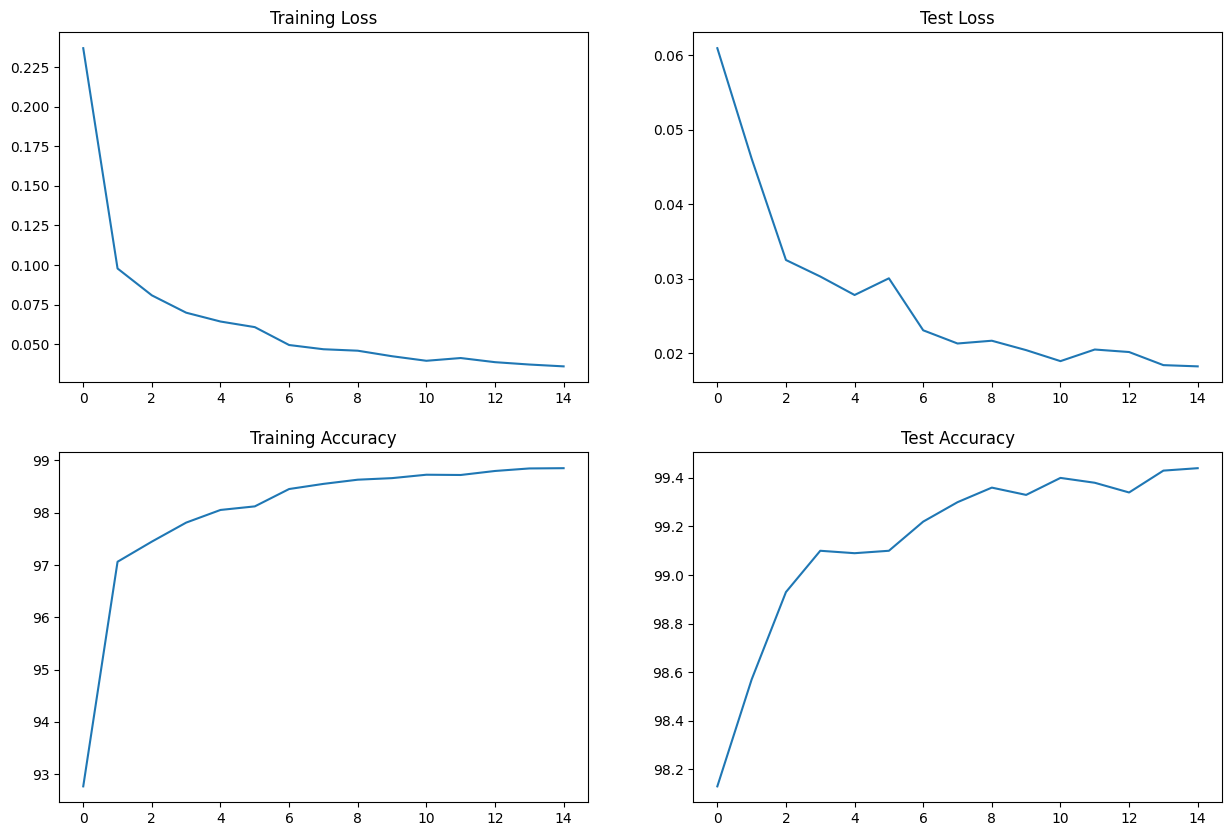

In [ ]:
from utils import plot_stats
plot_stats()

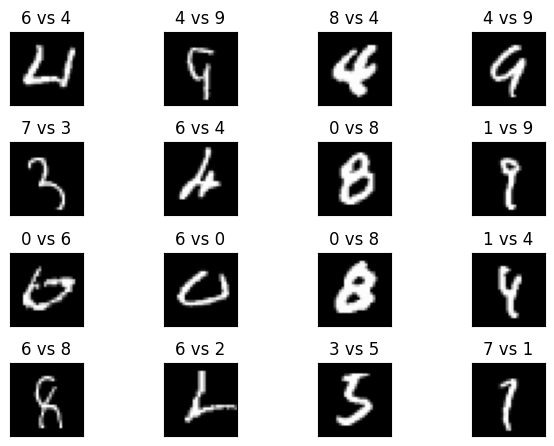

In [ ]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual